Flujo máximo total: 85
S → A1 : 20
S → A2 : 30
S → A3 : 35
A1 → I_A : 15
A1 → I_B : 5
A2 → I_B : 15
A2 → I_C : 10
A2 → I_D : 5
A3 → I_C : 15
A3 → I_D : 20
V_A → T : 15
V_B → T : 10
V_C → T : 25
V_D → T : 15
V_E → T : 20
I_A → V_A : 15
I_B → V_B : 10
I_B → V_C : 10
I_C → V_C : 15
I_C → V_D : 10
I_D → V_D : 5
I_D → V_E : 20


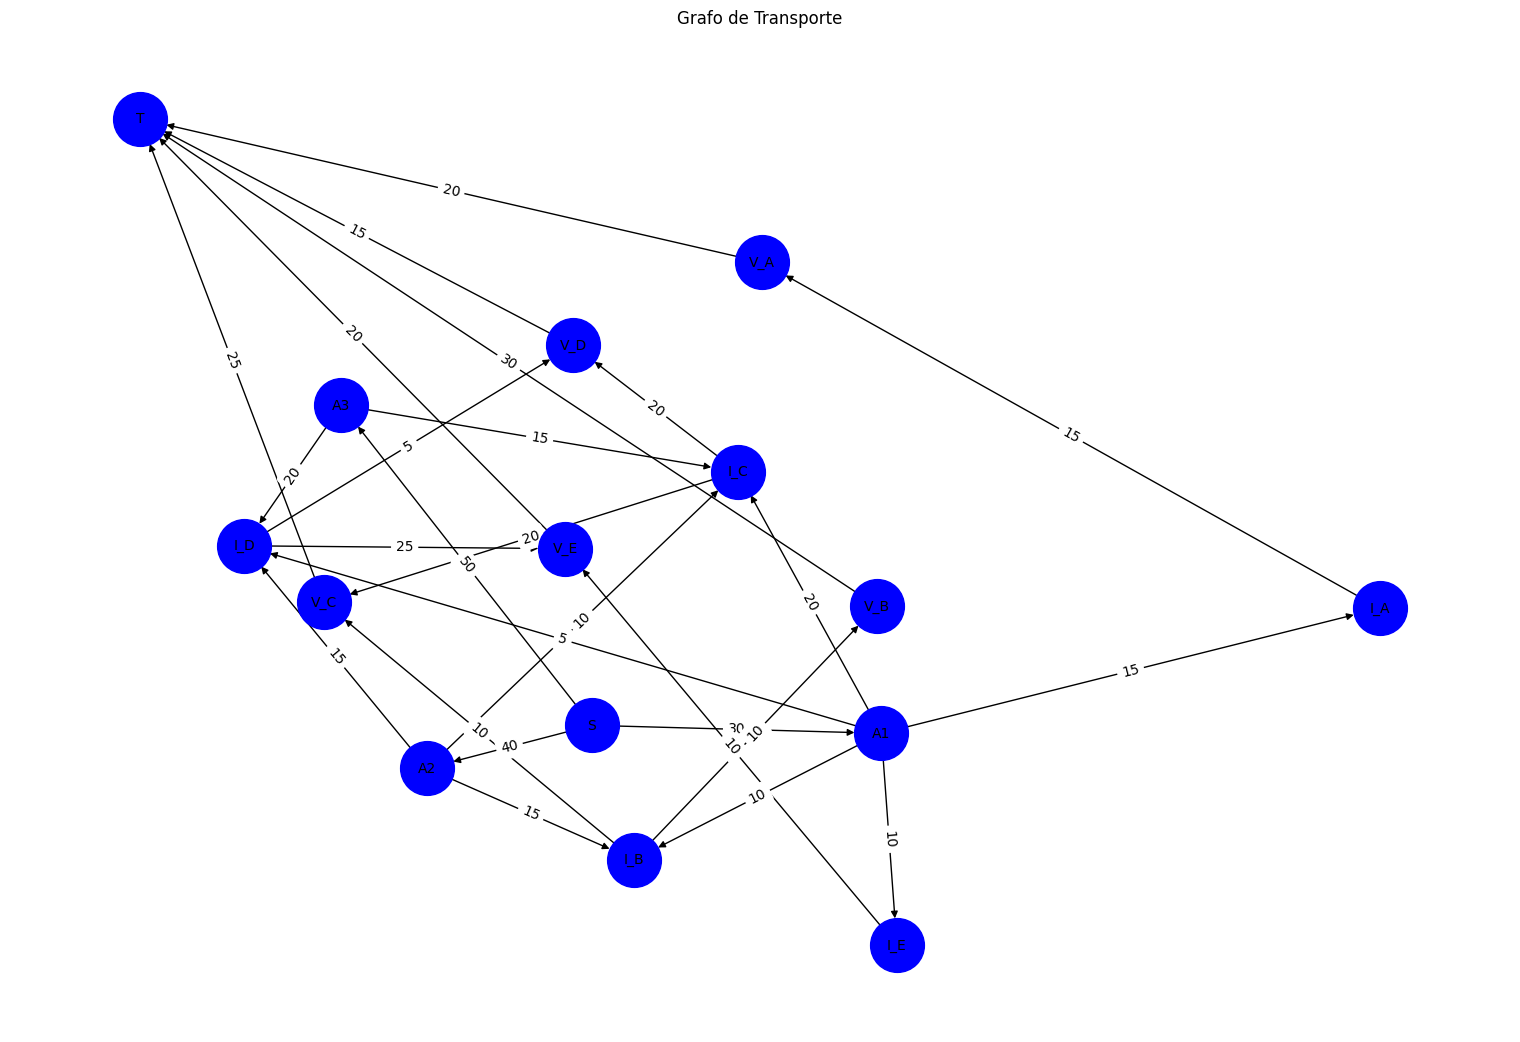

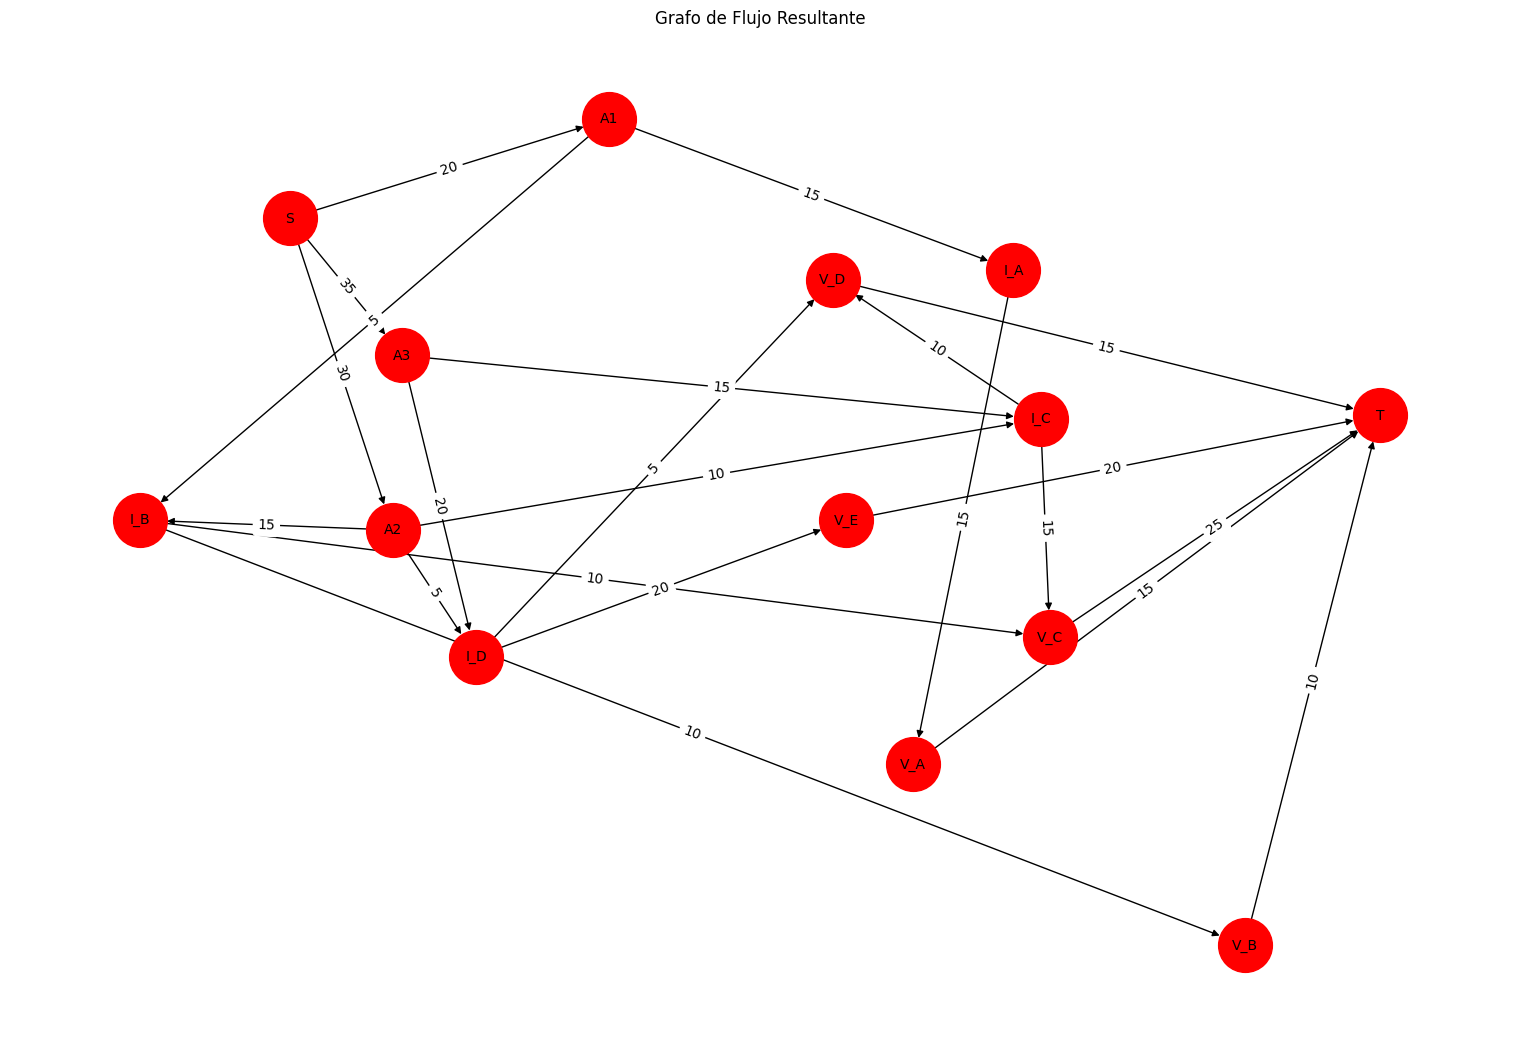

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

#Usé el algoritmo de flujo máximo Ford-Fulkerson ya que tenemos multiples
#puntos ed llega y salida y hay balance de flujo desde cada nodo.

G = nx.DiGraph()

nodo_inicio = 'S'
nodo_fin = 'T'

almacenes = {
    'A1': 30,
    'A2': 40,
    'A3': 50
}

ventas = {
    'V_A': 20,
    'V_B': 30,
    'V_C': 25,
    'V_D': 15,
    'V_E': 20
}

intermedios = ['I_A', 'I_B', 'I_C', 'I_D', 'I_E']

for a, cap in almacenes.items():
    G.add_edge(nodo_inicio, a, capacity=cap)

for v, cap in ventas.items():
    G.add_edge(v, nodo_fin, capacity=cap)

rutas = [
    ('A1', 'I_A', 15), ('I_A', 'V_A', 15),
    ('A1', 'I_B', 10), ('I_B', 'V_B', 10),
    ('A1', 'I_C', 20), ('I_C', 'V_C', 20),
    ('A1', 'I_D', 5),  ('I_D', 'V_D', 5),
    ('A1', 'I_E', 10), ('I_E', 'V_E', 10),

    ('A2', 'I_B', 15), ('I_B', 'V_C', 10),
    ('A2', 'I_C', 10), ('I_C', 'V_D', 15),
    ('A2', 'I_D', 15), ('I_D', 'V_E', 5),

    ('A3', 'I_C', 15), ('I_C', 'V_D', 20),
    ('A3', 'I_D', 20), ('I_D', 'V_E', 25)
]

for u, v, cap in rutas:
    G.add_edge(u, v, capacity=cap)

flujo, flujo_detalle = nx.maximum_flow(G, nodo_inicio, nodo_fin)

print("Flujo máximo total:", flujo)

for u, d in flujo_detalle.items():
    for v, f in d.items():
        if f > 0:
            print(f"{u} → {v} : {f}")

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(15, 10))
nx.draw(G, pos, with_labels=True, node_color='blue', node_size=1500, font_size=10, edge_color='black')
labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Grafo de Transporte")
plt.show()

G_flujo = nx.DiGraph()
for u in flujo_detalle:
    for v, f in flujo_detalle[u].items():
        if f > 0:
            G_flujo.add_edge(u, v, weight=f)

plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_flujo, seed=42)
nx.draw(G_flujo, pos, with_labels=True, node_color='red', node_size=1500, font_size=10, edge_color='black')
labels = nx.get_edge_attributes(G_flujo, 'weight')
nx.draw_networkx_edge_labels(G_flujo, pos, edge_labels=labels)
plt.title("Grafo de Flujo Resultante")
plt.show()